In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
# Base level imports for data science work
import pandas as pd
import numpy as np
import re, string, unicodedata
import os
import scikitplot
from os import path
# Visualization Libs
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# NLP Libs
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk. tokenize import word_tokenize, sent_tokenize
from bs4 import BeautifulSoup
#from keras. preprocessing import text, sequence
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn. linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
# Additional Libs
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet


# **Import true and fake data** 

In [7]:
true = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")

## **Some info about dataframes:**

In [8]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [10]:
true.shape, fake.shape

((21417, 4), (23481, 4))

In [11]:
true.isna().count()

title      21417
text       21417
subject    21417
date       21417
dtype: int64

In [12]:
fake.isna().count()

title      23481
text       23481
subject    23481
date       23481
dtype: int64

In [13]:
# These dataframes do not currently have a category for whether they are true or fake.
# Let's create those before we combine the datasets 1 is true right? ok
true['target' ]= 'true'
fake['target']= 'fake'

# **Concatenate the datasets**

In [14]:
# Now we'll merge the two datasets into a single dataframe
all_news = pd.concat ([true, fake] )

In [15]:
all_news.sample(10)

,title,text,subject,date,target
538,Justice Department says White House may name n...,WASHINGTON (Reuters) - The White House may nam...,politicsNews,"November 26, 2017",true
4821,Trump's Russian imbroglio prompts Republican r...,WASHINGTON (Reuters) - Some Republican lawmake...,politicsNews,"March 20, 2017",true
4992,Anti-Trump Group Has Placed DETAILED Statues ...,Statues of Donald Trump have appeared in five ...,News,"August 18, 2016",fake
17211,TOP DEMOCRAT ACTIVIST WHO LAUNCHED ONLINE CAMP...,"CJ Pearson, the 12 year old conservative socia...",Government News,"Jul 9, 2015",fake
13497,BREAKING: Baton Rouge Cop Killer Shot DEAD By ...,Baton Rouge became the scene of another police...,politics,"Jul 17, 2016",fake
10002,Bitter John McCain Calls Trump ‘Ill Informed’ ...,What the heck! Senator John McCain just admitt...,politics,"Sep 1, 2017",fake
20477,WATCH: BLACK CONSERVATIVE DESTROYS Mexican Fla...,***LANGUAGE WARNING*** Why is it acceptable fo...,left-news,"Jun 4, 2016",fake
10348,Liberal groups urge non-violent movement to st...,"NEW YORK (Reuters) - U.S. liberal groups, divi...",politicsNews,"March 15, 2016",true
4803,U.S. offers new dates when Tillerson could att...,WASHINGTON (Reuters) - The U.S. State Departme...,politicsNews,"March 21, 2017",true
11425,LIBERAL SNOWFLAKE Ambushes Sean Spicer in Appl...,Read more: Daily Mail,politics,"Mar 13, 2017",fake


In [16]:
all_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [17]:
all_news = all_news.applymap(str)

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

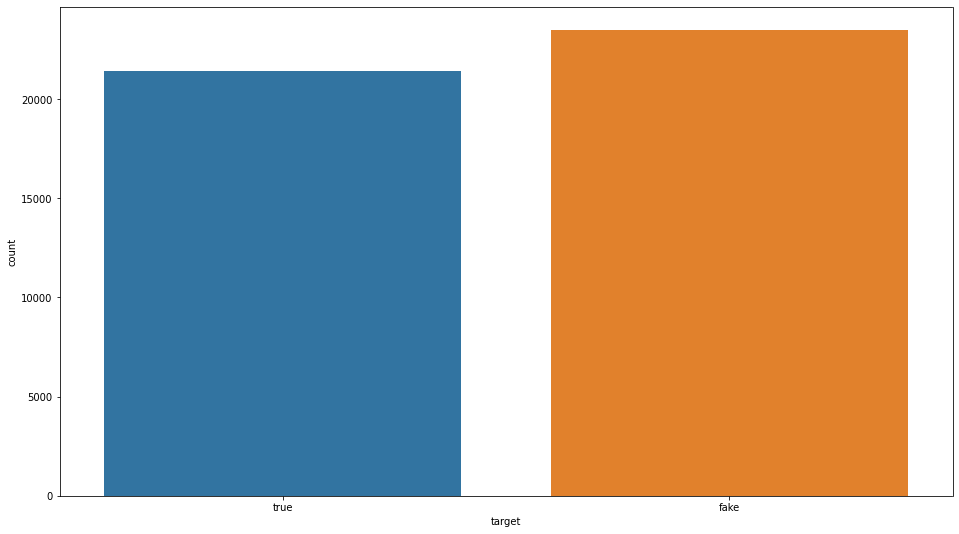

In [18]:
plt.figure(figsize=(16,9))
sns.countplot(all_news.target)

In [19]:
all_news.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

<AxesSubplot:xlabel='subject', ylabel='count'>

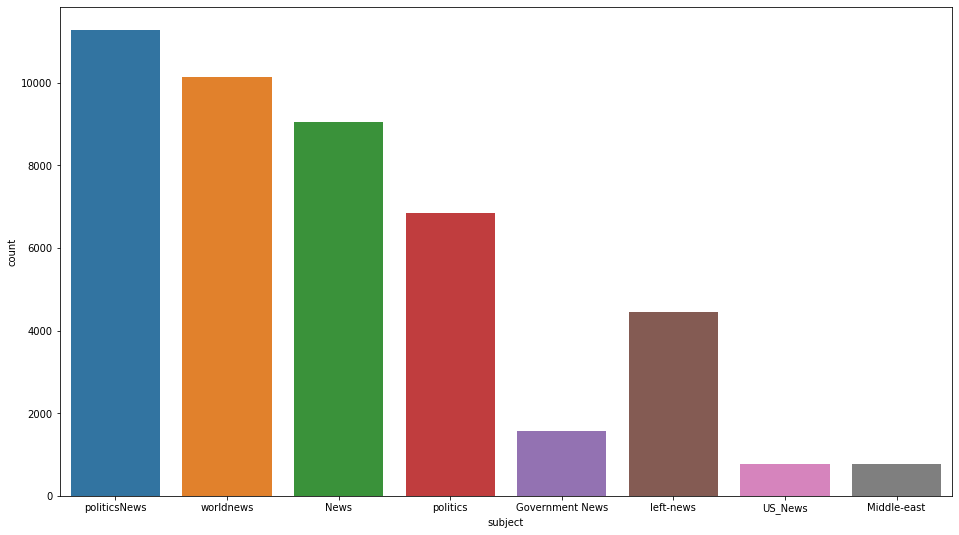

In [20]:
plt.figure(figsize=(16,9))
sns.countplot (x='subject', data=all_news)

<AxesSubplot:xlabel='subject', ylabel='count'>

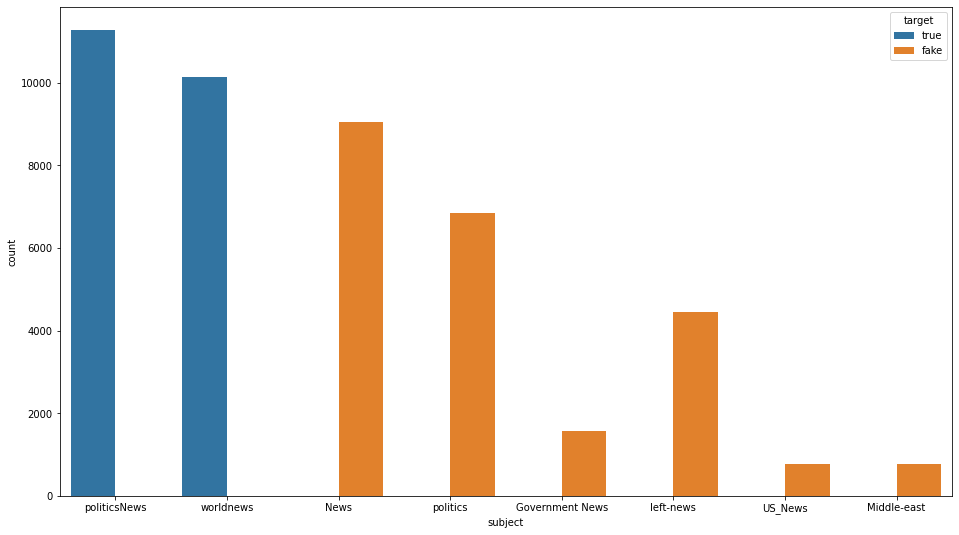

In [21]:
plt.figure(figsize=(16,9))
sns.countplot(x='subject', hue='target', data=all_news)

In [22]:
# Now we'll create the Corpus that will be used in our NLP model
# This will create a single column with all the relevant text
all_news['text'] = (all_news['title'] +" "+ all_news['text'])
# This will delete all the other columns we do not need for the rest of the work.
del all_news['title'] # added to our text corpus
del all_news['subject'] # we determined it would affect our results
del all_news['date'] # this might be an interesting item to keep in a future analysis that spans more time

In [23]:
all_news.head()

,text,target
0,"As U.S. budget fight looms, Republicans flip t...",true
1,U.S. military to accept transgender recruits o...,true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,true
3,FBI Russia probe helped by Australian diplomat...,true
4,Trump wants Postal Service to charge 'much mor...,true


**Cleaning the dataset**

In [24]:
# Now we need to clean up the corpus. We'll do this by removing stop words, URLs, brackets, etc.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = set(nltk.corpus.stopwords.words("english"))
stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dorriah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [25]:
def remove_stopwords(text):
    text = word_tokenize(text)
    stopwords = set(nltk.corpus.stopwords.words("english"))
    important_stopwords = {"not"}
    remove_them = important_stopwords.symmetric_difference(stopwords)
    tokenz = [word for word in text if not word in stopwords]
    return ' '.join(tokenz)

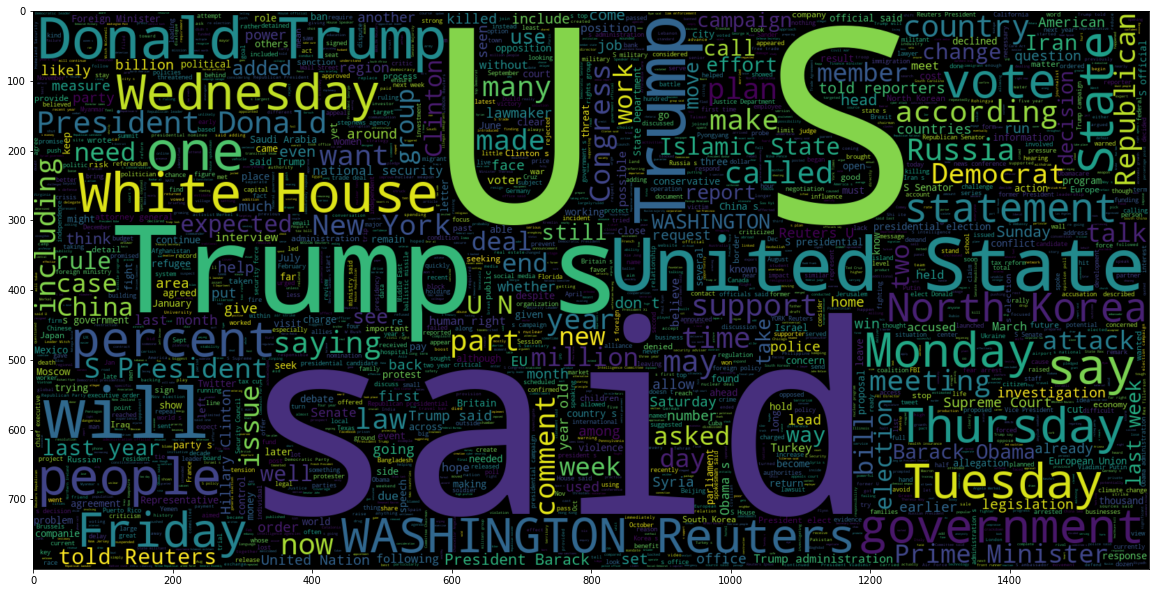

In [26]:
plt.figure(figsize = (20,20) ) # Text that is not Fake
WC= WordCloud(max_words = 2000, width = 1600, height = 800, stopwords=STOPWORDS).generate(" ".join(all_news[all_news.target == 'true'].text))
plt. imshow(WC, interpolation ="bilinear")

In [27]:
all_news = all_news.applymap(str)

In [28]:
all_news.head()

,text,target
0,"As U.S. budget fight looms, Republicans flip t...",true
1,U.S. military to accept transgender recruits o...,true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,true
3,FBI Russia probe helped by Australian diplomat...,true
4,Trump wants Postal Service to charge 'much mor...,true


In [29]:
def c(text):
  appos = {
      "i'm":"i am",
      "you're":"you are",
      "we're":"we are",
      "they're":"they are",
      "she's":"she is",
      "he's":"he is",
      "it's":"it is",
      "i've":"i have",
      "you've":"you have",
      "we've":"we have",
      "they've":"they have",
      "i'll":"i will",
      "you'll":"you will",
      "he'll":"he will",
      "she'll":"she will",
      "we'll":"we will",
      "they'll":"they will",
      "i'd":"i had",
      "you'd":"you had",
      "he'd":"he had",
      "she'd":"she had",
      "aren't":"are not",
      "can't":"can not",
      "couldn't":"could not",
      "didn't":"did not",
      "hasn't":"has not",
      "hadn't":"had not",
      "haven't":"have not",
      "isn't":"is not",
      "mustn't":"must not",
      "shouldn't":"should not",
      "wasn't":"was not",
      "weren't":"were not",
      "won't":"will not",
      "wouldn't":"would not",

      "u.s.": "US",
      "u.s.'s":"US",
      "n.y.":"NY",
      "n.y.'s":"NY",
      "u.n.":"UN",
      "u.n.'s":"UN",
      "eu's":"EU",
      "'ceo'":"CEO",
      "uk's":"UK",
      "u.k.":"UK"

  }
  text = text.lower()
  text = text.split()
  reformed = [appos[word] if word in appos else word for word in text]
  return " ".join(reformed)
all_news['text'] = all_news['text'].apply(c)

**Tokenization**

In [30]:
import nltk
nltk.download('punkt')
def clean(text):
    # Lowering letters
    #text = text.lower()
   
    # Removing emails & twitter usernames
    #text = re.sub('\S*@\S*', '', text)
   
    # Removing urls (S+ matches all non whitespace chars)
    text = re.sub(r'http\S*', '', text)
   
    # Removing numbers
    text = re.sub('[^a-zA-Z]',' ',text)

    text = text.lower()
    
    # Removing all whitespaces and join with proper space
    word_tokens = word_tokenize(text)    

    return ' '.join(word_tokens)

all_news['text'] = all_news['text'].apply(clean)

[nltk_data] Downloading package punkt to /Users/dorriah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
all_news.head()

,text,target
0,as us budget fight looms republicans flip thei...,true
1,us military to accept transgender recruits on ...,true
2,senior us republican senator let mr mueller do...,true
3,fbi russia probe helped by australian diplomat...,true
4,trump wants postal service to charge much more...,true


In [32]:
def targetToNum(x):
  if x == 'true':
    return 1
  elif x == 'fake':
    return 0
all_news['target'] = all_news['target'].apply(targetToNum)
all_news.head()

,text,target
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1


**Dataset spliting**

In [33]:
# Now that we've done a bit of data exploration, let's get into modeling
# First up, we need to Train Test Split the data
X= all_news.text
y = all_news.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, stratify=y, random_state=19)
y_train.head()

5388     1
20885    1
4800     0
6597     0
5254     1
Name: target, dtype: int64

**Count Vectorize**

In [34]:
# Create of Count Vectorize object
cv=CountVectorizer(min_df=0, max_df=1, binary=False, ngram_range=(1,3))

# Transform the train dataset
cv_train=cv.fit_transform(X_train)

# Transform the test dataset
cv_test=cv.transform(X_test)

print('Bag of words Train:', cv_train.shape)
print('Bag of words Test:', cv_test.shape)

Bag of words Train: (35918, 6473442)
Bag of words Test: (8980, 6473442)


**TF-IDF Vectorize**

In [35]:
# Create of TF-IDF Vectorize object
tfidf = TfidfVectorizer ( min_df=0 , max_df=1 , use_idf = True , ngram_range = ( 1,3 ) ) 
#Transform the train dataset 
tfidf_train = tfidf.fit_transform( X_train ) 
# Transform the test dataset 
tfidf_test = tfidf.transform( X_test ) 
print ( 'TF - IDF Train :' , tfidf_train.shape ) 
print ( 'TF - IDF Test :' , tfidf_test.shape )

TF - IDF Train : (35918, 6473442)
TF - IDF Test : (8980, 6473442)


# **Proposed Models**

# **MultinomialNB (Naive Bayes)**

In [36]:
# Create our model object 
mnb = MultinomialNB ( ) 

#fit the model to the bag of words CountVectorizor
mnb_cv=mnb.fit(cv_train, y_train)

#fit the model to the TF-IDF features
mnb_tfidf=mnb.fit (tfidf_train , y_train) 

In [37]:
# Predicting the model for bag of words
mnb_cv_predict = mnb.predict(cv_test) 
#Predicting the model for tf - idf features
mnb_tfidf_predict = mnb.predict ( tfidf_test ) 

In [38]:
# Check the accuracy score for bag of words
mnb_cv_score = accuracy_score ( y_test , mnb_cv_predict ) 
print (" Naive Bayes Bag of words accuracy score : " , mnb_cv_score)
# Check the accuracy score for tfidf features 
mnb_tfidf_score = accuracy_score(y_test, mnb_tfidf_predict ) 
print ( " Naive Bayes TF - IDF accuracy score : " , mnb_tfidf_score )

 Naive Bayes Bag of words accuracy score :  0.9422048997772828
 Naive Bayes TF - IDF accuracy score :  0.9195991091314031


In [39]:
mnb_cv_report=classification_report(y_test, mnb_cv_predict, target_names=['0','1'])
print(mnb_cv_report)
mnb_tfidf_report=classification_report(y_test, mnb_tfidf_predict, target_names=['0','1'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4696
           1       0.94      0.93      0.94      4284

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      4696
           1       0.97      0.85      0.91      4284

    accuracy                           0.92      8980
   macro avg       0.93      0.92      0.92      8980
weighted avg       0.93      0.92      0.92      8980



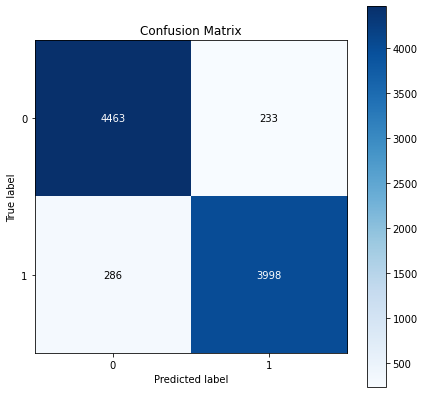

In [40]:
scikitplot.metrics.plot_confusion_matrix(y_test, mnb_cv_predict, figsize=(7,7))
plt.savefig("confusion_matrix_nb1.png")

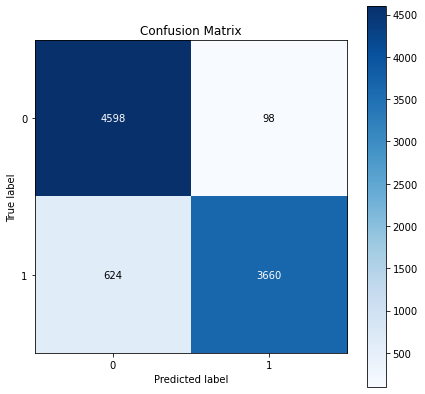

In [41]:
scikitplot.metrics.plot_confusion_matrix(y_test, mnb_tfidf_predict, figsize=(7,7))
plt.savefig("confusion_matrix_nb2.png")

# **Support Vector Machine**

In [55]:
from sklearn.svm import LinearSVC

svm = LinearSVC()


In [60]:
param_grid2 = {'C': [0.1, 1, 10,100]}

In [61]:
CV_svm=GridSearchCV(estimator=svm, param_grid=param_grid2, cv= 5)
#fit the model to the bag of words CountVectorizor
svm_cv=CV_svm.fit(cv_train, y_train)

/opt/homebrew/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [62]:
#fit the model to the TF-IDF features
svm_tfidf=CV_svm.fit (tfidf_train , y_train)

/opt/homebrew/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [63]:
svm_cv.best_params_

{'C': 0.1}

In [64]:
svm_tfidf.best_params_

{'C': 0.1}

In [65]:
# Predicting the model for bag of words
svm_cv_predict = CV_svm.predict(cv_test) 
#Predicting the model for tf - idf features
svm_tfidf_predict = CV_svm.predict ( tfidf_test ) 

In [66]:
# Check the accuracy score for bag of words
svm_cv_score = accuracy_score ( y_test , svm_cv_predict ) 
print (" Support vector machine Bag of words accuracy score : " , svm_cv_score)
# Check the accuracy score for tfidf features 
svm_tfidf_score = accuracy_score(y_test, svm_tfidf_predict ) 
print ( " Support vector machine TF - IDF accuracy score : " , svm_tfidf_score )

 Support vector machine Bag of words accuracy score :  0.9203786191536748
 Support vector machine TF - IDF accuracy score :  0.6426503340757238


In [67]:
svm_cv_report=classification_report(y_test, svm_cv_predict, target_names=['0','1'])
print(svm_cv_report)
svm_tfidf_report=classification_report(y_test, svm_tfidf_predict, target_names=['0','1'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      4696
           1       0.94      0.89      0.91      4284

    accuracy                           0.92      8980
   macro avg       0.92      0.92      0.92      8980
weighted avg       0.92      0.92      0.92      8980

              precision    recall  f1-score   support

           0       0.59      1.00      0.75      4696
           1       0.99      0.25      0.40      4284

    accuracy                           0.64      8980
   macro avg       0.79      0.63      0.57      8980
weighted avg       0.78      0.64      0.58      8980



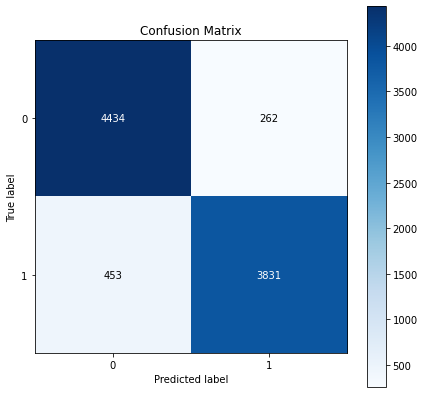

In [68]:
scikitplot.metrics.plot_confusion_matrix(y_test, svm_cv_predict, figsize=(7,7))
plt.savefig("confusion_matrix_svm1.png")

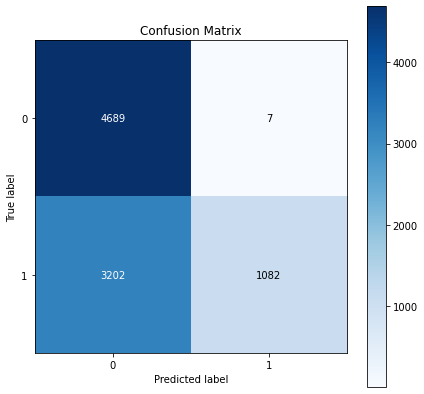

In [69]:
scikitplot.metrics.plot_confusion_matrix(y_test, svm_tfidf_predict, figsize=(7,7))
plt.savefig("confusion_matrix_svm2.png")